<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [14]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Виведіть основні числові характеристики для числових ознак

In [36]:
stats = {}
def figure_characteristics(df, column):
  if df[column].dtypes not in ("object", "datetime64[ns]"):
    count = df[column].count()
    mean = df[column].mean().round(3)
    median = df[column].median().round(3)
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    std = df[column].std().round(3)
    min = df[column].min()
    max = df[column].max()
    stats[column] = {'count': count, 'mean': mean, 'median' : median, 'q1': q1, 'q3': q3, 'std': std,  'min': min, 'max': max}

for column in df.columns:
  figure_characteristics(df,column)

for key, value in stats.items():
  print(f"{key} = {value} \n")

#df.describe()

case = {'count': 104, 'mean': 52.5, 'median': 52.5, 'q1': 26.75, 'q3': 78.25, 'std': 30.166, 'min': 1, 'max': 104} 

site = {'count': 104, 'mean': 3.625, 'median': 3.0, 'q1': 1.0, 'q3': 6.0, 'std': 2.349, 'min': 1, 'max': 7} 

age = {'count': 102, 'mean': 3.833, 'median': 3.0, 'q1': 2.25, 'q3': 5.0, 'std': 1.909, 'min': 1.0, 'max': 9.0} 

hdlngth = {'count': 104, 'mean': 92.603, 'median': 92.8, 'q1': 90.675, 'q3': 94.725, 'std': 3.573, 'min': 82.5, 'max': 103.1} 

skullw = {'count': 104, 'mean': 56.884, 'median': 56.35, 'q1': 54.975, 'q3': 58.1, 'std': 3.113, 'min': 50.0, 'max': 68.6} 

totlngth = {'count': 104, 'mean': 87.088, 'median': 88.0, 'q1': 84.0, 'q3': 90.0, 'std': 4.311, 'min': 75.0, 'max': 96.5} 

taill = {'count': 104, 'mean': 37.01, 'median': 37.0, 'q1': 35.875, 'q3': 38.0, 'std': 1.96, 'min': 32.0, 'max': 43.0} 

footlgth = {'count': 103, 'mean': 68.459, 'median': 68.0, 'q1': 64.6, 'q3': 72.5, 'std': 4.395, 'min': 60.3, 'max': 77.9} 

earconch = {'count': 104, 'mean': 48.

# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

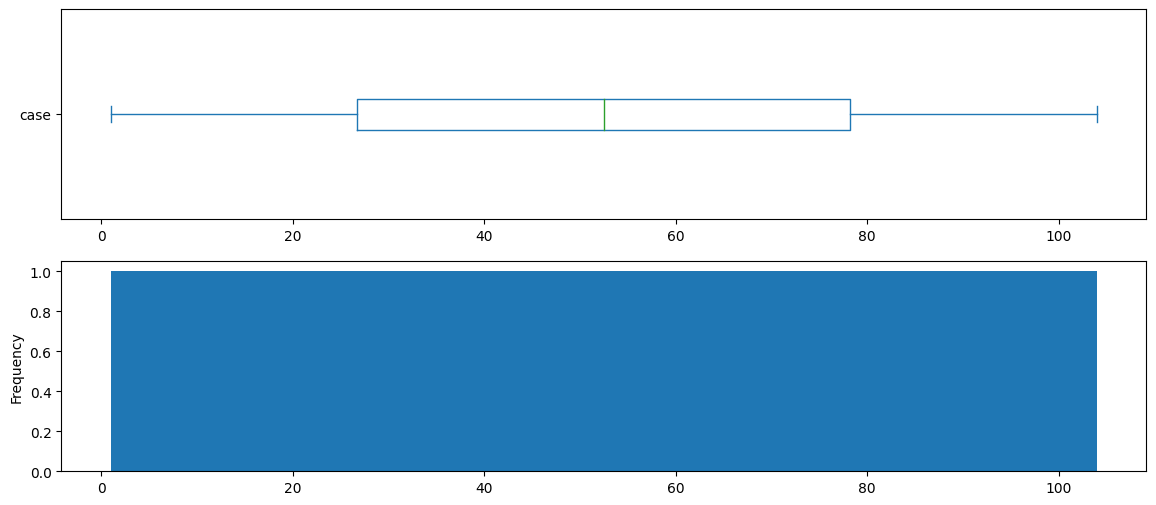

In [32]:
df['case'].nunique()
plt.subplot(211)
df['case'].plot(kind='box', vert=False, figsize=(14,6))
plt.subplot(212)
df['case'].plot(kind='hist',  bins=104, figsize=(14,6))
plt.show()

# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [35]:
print("Original shape: ", df.shape)
def remove_outliers(df, column_name):
  q1 = df[column_name].quantile(q=0.25)
  q3 = df[column_name].quantile(q=0.75)

  IQR = q3 - q1
  lower = q1 - 1.5*IQR
  upper = q3 + 1.5*IQR

  mask = (df[column_name] >= lower) & (df[column_name] <= upper)
  return df[mask]

df1 = df.copy()

for column_name in df1.columns:
  if df1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  df1 = remove_outliers(df1, column_name)

print("New shape: ", df1.shape)

Original shape:  (104, 14)
New shape:  (85, 14)


In [44]:
num_df = df.select_dtypes(include='number')
q1 = num_df.quantile(q=0.25)
q3 = num_df.quantile(q=0.75)

IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
mask = (num_df >= lower) & (num_df <= upper)
df[mask.all(axis=1)].shape

(85, 14)

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума